In [ ]:
!wget https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/Image%20Processing/traffic_light/level%201/green.png
!wget https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/Image%20Processing/traffic_light/level%201/red.png
!wget https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/Image%20Processing/traffic_light/level%201/yellow.png

In [268]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [269]:
def show(img):
    plt.figure(figsize=(10,10))#, dpi=200)
    plt.imshow(img, cmap='gray')
    plt.grid(alpha=0.2)
    plt.axis('off')
    plt.show()

In [270]:
def img_opener(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img, gray

In [271]:
def img_mask(img):
    helper_array = np.zeros(img.shape, dtype=np.uint8)
    mask = cv2.rectangle(helper_array, (175,30), (310,450), color=(255,255,255), thickness=-1)
    mask_img = cv2.bitwise_and(img, mask)
    return mask_img

In [272]:
def img_filter(img):
    filter = cv2.blur(img, (6,6))
    n=20
    karnel = np.ones((n,n), np.uint8)
    filter = cv2.morphologyEx(filter, cv2.MORPH_OPEN, karnel)
   
    filter = cv2.cvtColor(filter, cv2.COLOR_GRAY2RGB)

    return filter

In [273]:
RED_RGB,RED_gray = img_opener('red.png')
YELLOW_RGB,YELLOW_gray =  img_opener('yellow.png')
GREEN_RGB,GREEN_gray = img_opener('green.png')

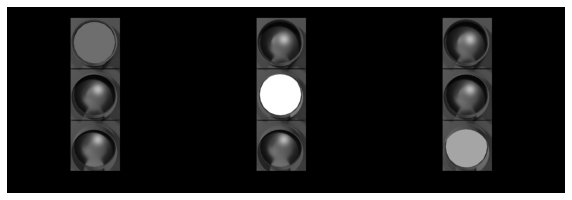

(512, 512)


In [274]:
red_mask = img_mask(RED_gray)
yellow_mask = img_mask(YELLOW_gray)
green_mask = img_mask(GREEN_gray)

show(np.hstack((red_mask, yellow_mask, green_mask)))
print(red_mask.shape)

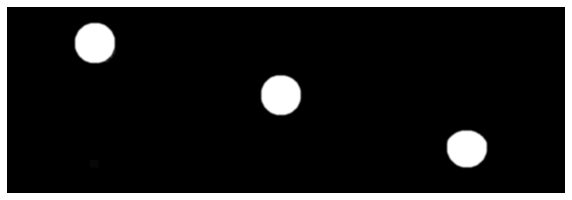

In [275]:
ranging_img_red = cv2.inRange(red_mask, 91, 95)
ranging_img_yellow = cv2.inRange(yellow_mask, 215, 217)
ranging_img_green = cv2.inRange(green_mask, 138, 146)

red_filter = img_filter(ranging_img_red)
yellow_filter = img_filter(ranging_img_yellow)
green_filter = img_filter(ranging_img_green)

show(np.hstack((red_filter, yellow_filter, green_filter)))

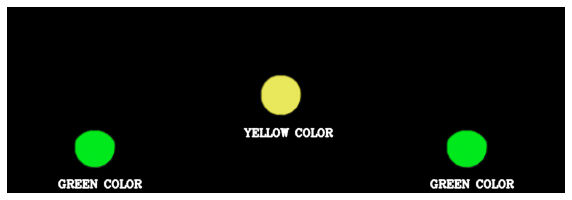

In [346]:
h,w = RED_RGB.shape[:2]
RED = cv2.bitwise_and(RED_RGB, red_filter)
RED = cv2.putText(RED, 'RED COLOR', (w//3-30, h//3+15), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 3 )
YELLOW = cv2.bitwise_and(YELLOW_RGB, yellow_filter)
RED = cv2.putText(YELLOW, 'YELLOW COLOR', (w//3-30, 2*h//3+15), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 3 )
GREEN = cv2.bitwise_and(GREEN_RGB, green_filter)
RED = cv2.putText(GREEN, 'GREEN COLOR', (w//3-30, 3*h//3-15), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 3 )

show(np.hstack((RED, YELLOW, GREEN)))

In [277]:
def dividing(red_color, yellow_color, green_color):
    H, W = red_color.shape[:2]
    w = W//3
    h = H//3
    red = red_color[20:w,:,:]
    yellow = yellow_color[w:2*w-20,:,:]
    green = green_color[2*w-20:3*w-40,:,:]

    return red, yellow, green

(150, 512, 3)
(150, 512, 3)
(150, 512, 3)
(512, 512, 3)


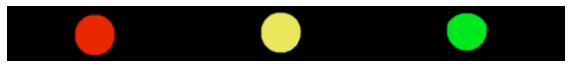

In [278]:
red, yellow, green = dividing(RED, YELLOW, GREEN)
print(red.shape)
print(yellow.shape)
print(green.shape)
print(RED_RGB.shape)
show(np.hstack((red, yellow, green)))

In [335]:
def color_finder(img):
    H, W =img.shape[:2]
    w = W//3
    h = H//3
    color = ''
    
    red = img[:h,:]
    yellow = img[h:2*h,:]
    green = img[2*h:3*h,:]

    zeros_red = len(red[red==0])
    zeros_yellow = len(yellow[yellow==0])
    zeros_green = len(green[green==0])
    
    min_zeros = min(zeros_red, zeros_yellow, zeros_green)
    
    if min_zeros==zeros_red:
        color = 'RED'
    if min_zeros==zeros_yellow:
        color = 'YELLOW'
    if min_zeros==zeros_green:
        color = 'GREEN'    
    return color

In [336]:
color1=color_finder(red_filter)
color2=color_finder(yellow_filter)
color3=color_finder(green_filter)

print(color1)
print(color2)
print(color3)

RED
YELLOW
GREEN
